We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from numpy import asarray
from sklearn.preprocessing import StandardScaler

## Load and review data

In [2]:
cData = pd.read_csv(r"C:\Users\Navnit Ashok Nair\OneDrive\Desktop\SINDy\TBC_data_study_1.csv")  
cData.shape

(153, 15)

In [3]:
cData=cData.drop(['Unnamed: 0','std_rho','std_R','RelativeDessityError','RelativeTBCError','dT'],axis=1)
cData.head()

,NSheets,WidthWater,LengthGraphene,Temperature,Pressure,ContactAngle,SurfaceTension,RelativeDensity,RelativeTBR
0,8,30,60,280,1,120,75.741886,1.487170,1.585502
1,8,30,60,300,1,130,72.935536,1.548031,1.610285
2,8,30,60,280,1,130,75.741886,1.569903,1.818463
3,8,30,60,360,1,130,63.308599,1.598603,1.569393
4,8,30,60,340,1,120,66.709466,1.599308,1.339219


In [4]:
n=cData['NSheets'].unique().tolist()
#n=n.sort()
n.sort()
n

[2, 4, 8, 12, 18, 28, 38]

TRAINING : DEGREE TWO _ 2 _ 0.9876417484411296
TEST : DEGREE TWO _  2 _ -2.584715927082704
TRAINING : DEGREE TWO _ 4 _ 0.7849261475321893
TEST : DEGREE TWO _  4 _ -0.20173958681976312
TRAINING : DEGREE TWO _ 8 _ 0.9580498355260544
TEST : DEGREE TWO _  8 _ 0.8614448107228697
TRAINING : DEGREE TWO _ 12 _ 0.9779360780939168
TEST : DEGREE TWO _  12 _ -301.3742033072497
TRAINING : DEGREE TWO _ 18 _ 0.982565224059626
TEST : DEGREE TWO _  18 _ -0.7923382777985122
TRAINING : DEGREE TWO _ 28 _ 0.9508272687918736
TEST : DEGREE TWO _  28 _ -2.4581110023490247
TRAINING : DEGREE TWO _ 38 _ 0.9823608558913691
TEST : DEGREE TWO _  38 _ -6.004372122729321
           1  WidthWater  LengthGraphene  Temperature  Pressure  ContactAngle  \
NSheets                                                                         
2        0.0    0.017926       -0.020318     0.000000  0.000000      0.000000   
4        0.0    0.012171       -0.045412     0.000000  0.000000      0.000000   
8        0.0    0.026405    

C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_16848\1700664075.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_16848\1700664075.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_16848\1700664075.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_16848\1700664075.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fr

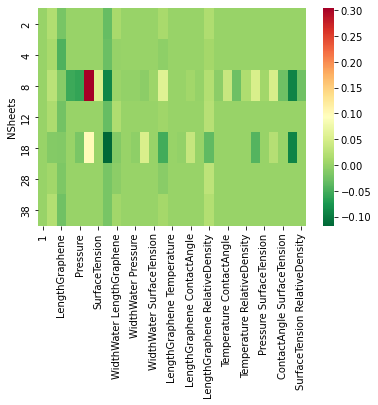

In [6]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
for i in n:
    cData1=cData[cData['NSheets']==i]
    X = cData1.drop(['RelativeTBR','NSheets'], axis=1)
    y = cData1[['RelativeTBR']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
    
    # created scaler
    scaler = StandardScaler()
    # fit scaler on training dataset
    scaler.fit(X_train)
    # transform training dataset
    X_train = scaler.transform(X_train)
    # transform test dataset
    X_test = scaler.transform(X_test)
    
    
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)

    poly_clf = linear_model.Ridge()
    poly_clf.fit(X_train2, y_train)
    y_pred2 = poly_clf.predict(X_test2)
    print("TRAINING : DEGREE TWO _",i,"_",poly_clf.score(X_train2, y_train))
    print("TEST : DEGREE TWO _ ",i,"_", poly_clf.score(X_test2, y_test))

   

    features = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out(X.columns))
   # print(i,"____\n",features,"\n---------------------")
    
    lreg_coefficient = pd.DataFrame()
    lreg_coefficient["Columns"] = features.columns
    lreg_coefficient['Coefficient Estimate'] = pd.Series(poly_clf.coef_.flatten())
    lreg_coefficient = lreg_coefficient.set_index('Columns').T
    lreg_coefficient["NSheets"] = i

    #print("Degree 2 Coefficients", lreg_coefficient)
    if (i==2):
        df_frame = lreg_coefficient.copy()
    else:
        df_frame = df_frame.append(lreg_coefficient)

    
df_frame = df_frame.rename_axis(None, axis="columns")
df_frame.reset_index(drop=True, inplace=True)
df_frame = df_frame.set_index('NSheets')
print(df_frame)
sns.heatmap(df_frame, cmap='RdYlGn_r')
plt.show()


    

    
        